In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")


Matplotlib is building the font cache; this may take a moment.


In [11]:
# Load company dataset
df = pd.read_excel(r"C:\Users\K.L.Prasanna\Downloads\Company.xlsx")

df


,Company,Symbol,MarketCap,RevenueGrowth,ProfitMargin,CashFlow,RiskScore
0,Apple,AAPL,2800,0.08,0.25,0.30,0.10
1,Microsoft,MSFT,3000,0.10,0.32,0.35,0.08
2,NVIDIA,NVDA,2200,0.35,0.40,0.38,0.18
3,Amazon,AMZN,1600,0.12,0.10,0.20,0.20
4,Tesla,TSLA,800,0.18,0.14,0.15,0.25


In [3]:
def market_cap_category(market_cap):
    if market_cap >= 500:
        return "Above $500B"
    elif market_cap >= 100:
        return "$100B–$500B"
    else:
        return "Below $100B"

df["MarketCap Category"] = df["MarketCap"].apply(market_cap_category)

df


,Company,Symbol,MarketCap,RevenueGrowth,ProfitMargin,CashFlow,RiskScore,MarketCap Category
0,Apple,AAPL,2800,0.08,0.25,0.30,0.10,Above $500B
1,Microsoft,MSFT,3000,0.10,0.32,0.35,0.08,Above $500B
2,NVIDIA,NVDA,2200,0.35,0.40,0.38,0.18,Above $500B
3,Amazon,AMZN,1600,0.12,0.10,0.20,0.20,Above $500B
4,Tesla,TSLA,800,0.18,0.14,0.15,0.25,Above $500B


In [4]:
def calculate_health_score(row):
    score = (
        row["RevenueGrowth"] * 30 +
        row["ProfitMargin"] * 25 +
        row["CashFlow"] * 25 +
        (1 - row["RiskScore"]) * 20
    )
    return round(score, 2)

df["HealthScore (%)"] = df.apply(calculate_health_score, axis=1)

df


,Company,Symbol,MarketCap,RevenueGrowth,ProfitMargin,CashFlow,RiskScore,MarketCap Category,HealthScore (%)
0,Apple,AAPL,2800,0.08,0.25,0.30,0.10,Above $500B,34.15
1,Microsoft,MSFT,3000,0.10,0.32,0.35,0.08,Above $500B,38.15
2,NVIDIA,NVDA,2200,0.35,0.40,0.38,0.18,Above $500B,46.40
3,Amazon,AMZN,1600,0.12,0.10,0.20,0.20,Above $500B,27.10
4,Tesla,TSLA,800,0.18,0.14,0.15,0.25,Above $500B,27.65


In [5]:
def generate_pros_cons(row):
    pros, cons = [], []

    if row["RevenueGrowth"] > 0.15:
        pros.append("Strong revenue growth")
    else:
        cons.append("Low revenue growth")

    if row["ProfitMargin"] > 0.2:
        pros.append("High profit margin")
    else:
        cons.append("Low profitability")

    if row["CashFlow"] > 0.25:
        pros.append("Strong cash flow")
    else:
        cons.append("Weak cash flow")

    if row["RiskScore"] > 0.2:
        cons.append("High risk exposure")
    else:
        pros.append("Low risk profile")

    return ", ".join(pros), ", ".join(cons)

df["Pros"], df["Cons"] = zip(*df.apply(generate_pros_cons, axis=1))

df


,Company,Symbol,MarketCap,RevenueGrowth,ProfitMargin,CashFlow,RiskScore,MarketCap Category,HealthScore (%),Pros,Cons
0,Apple,AAPL,2800,0.08,0.25,0.30,0.10,Above $500B,34.15,"High profit margin, Strong cash flow, Low risk...",Low revenue growth
1,Microsoft,MSFT,3000,0.10,0.32,0.35,0.08,Above $500B,38.15,"High profit margin, Strong cash flow, Low risk...",Low revenue growth
2,NVIDIA,NVDA,2200,0.35,0.40,0.38,0.18,Above $500B,46.40,"Strong revenue growth, High profit margin, Str...",
3,Amazon,AMZN,1600,0.12,0.10,0.20,0.20,Above $500B,27.10,Low risk profile,"Low revenue growth, Low profitability, Weak ca..."
4,Tesla,TSLA,800,0.18,0.14,0.15,0.25,Above $500B,27.65,Strong revenue growth,"Low profitability, Weak cash flow, High risk e..."


In [6]:
def get_top_companies(category, top_n):
    return (
        df[df["MarketCap Category"] == category]
        .sort_values("HealthScore (%)", ascending=False)
        .head(top_n)
    )

top_above_500B = get_top_companies("Above $500B", 5)
top_100_500B = get_top_companies("$100B–$500B", 7)
top_below_100B = get_top_companies("Below $100B", 10)

top_above_500B


,Company,Symbol,MarketCap,RevenueGrowth,ProfitMargin,CashFlow,RiskScore,MarketCap Category,HealthScore (%),Pros,Cons
2,NVIDIA,NVDA,2200,0.35,0.40,0.38,0.18,Above $500B,46.40,"Strong revenue growth, High profit margin, Str...",
1,Microsoft,MSFT,3000,0.10,0.32,0.35,0.08,Above $500B,38.15,"High profit margin, Strong cash flow, Low risk...",Low revenue growth
0,Apple,AAPL,2800,0.08,0.25,0.30,0.10,Above $500B,34.15,"High profit margin, Strong cash flow, Low risk...",Low revenue growth
4,Tesla,TSLA,800,0.18,0.14,0.15,0.25,Above $500B,27.65,Strong revenue growth,"Low profitability, Weak cash flow, High risk e..."
3,Amazon,AMZN,1600,0.12,0.10,0.20,0.20,Above $500B,27.10,Low risk profile,"Low revenue growth, Low profitability, Weak ca..."


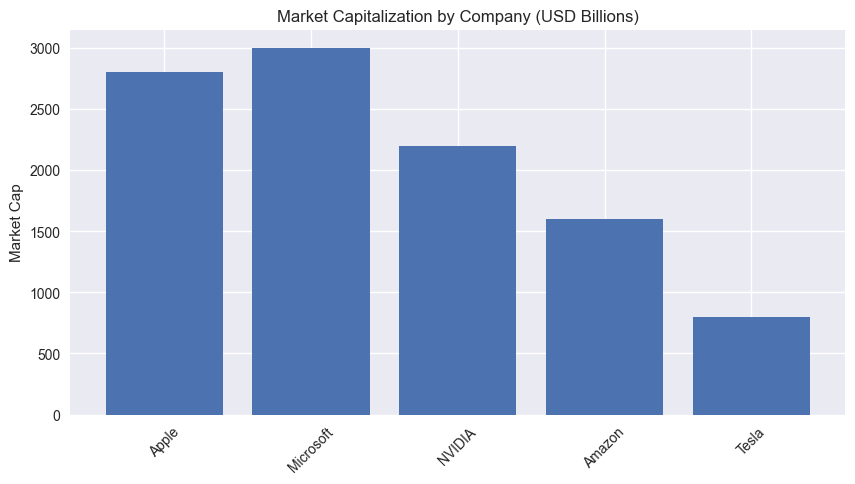

In [7]:
plt.figure(figsize=(10,5))
plt.bar(df["Company"], df["MarketCap"])
plt.title("Market Capitalization by Company (USD Billions)")
plt.ylabel("Market Cap")
plt.xticks(rotation=45)
plt.show()


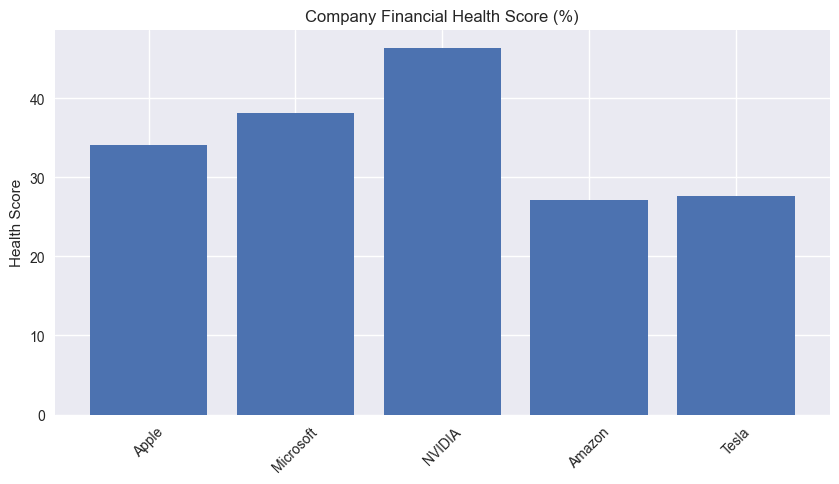

In [8]:
plt.figure(figsize=(10,5))
plt.bar(df["Company"], df["HealthScore (%)"])
plt.title("Company Financial Health Score (%)")
plt.ylabel("Health Score")
plt.xticks(rotation=45)
plt.show()


In [9]:
def company_health(company_name_or_symbol):
    result = df[
        (df["Company"].str.lower() == company_name_or_symbol.lower()) |
        (df["Symbol"].str.lower() == company_name_or_symbol.lower())
    ]

    if result.empty:
        return "Company not found"

    row = result.iloc[0]
    return {
        "Company": row["Company"],
        "Symbol": row["Symbol"],
        "Health Score (%)": row["HealthScore (%)"],
        "Pros": row["Pros"],
        "Cons": row["Cons"]
    }

# Example
company_health("NVDA")


{'Company': 'NVIDIA',
 'Symbol': 'NVDA',
 'Health Score (%)': np.float64(46.4),
 'Pros': 'Strong revenue growth, High profit margin, Strong cash flow, Low risk profile',
 'Cons': ''}

In [10]:
df.to_excel("HNI_Investment_Final_Dataset.xlsx", index=False)
